In [1]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
key = "f2068ddb628b48d698e6be65487da725"

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(key)

In [5]:
# Fetch the Bitcoin news articles
btcnewsarticles = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")

In [6]:
# Fetch the Ethereum news articles
ethnewsarticles = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btcnewsarticles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        btc_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
btc_df = btc_df[cols]

btc_df.head()

,compound,negative,neutral,positive,text
0,-0.4767,0.094,0.906,0.000,"Authorities in Tampa, Florida have arrested a ..."
1,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec..."
2,-0.4019,0.074,0.926,0.000,"On July 15, a Discord user with the handle Kir..."
3,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi..."
4,-0.0516,0.071,0.864,0.065,"The question still remained, though, whether a..."


In [8]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in ethnewsarticles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
eth_df = eth_df[cols]

eth_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...
1,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
2,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...
3,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...
4,0.3400,0.000,0.928,0.072,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.00000,20.000000,20.000000
mean,0.166280,0.03530,0.895550,0.069150
std,0.437014,0.05445,0.052494,0.054345
min,-0.680800,0.00000,0.762000,0.000000
25%,-0.070700,0.00000,0.862000,0.000000
50%,0.350000,0.00000,0.910000,0.081500
75%,0.507000,0.07175,0.926250,0.090000
max,0.624900,0.15700,1.000000,0.184000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.076600,0.029389,0.919833,0.050778
std,0.376307,0.055994,0.087978,0.062331
min,-0.599400,0.000000,0.732000,0.000000
25%,-0.077025,0.000000,0.878000,0.000000
50%,0.000000,0.000000,0.935500,0.022500
75%,0.317100,0.039000,1.000000,0.078000
max,0.771700,0.189000,1.000000,0.181000


### Questions:

Q: Which coin had the highest mean positive score?

A: The Bitcoin Sentiments were more positive overall. 

Q: Which coin had the highest compound score?

A: The highest compount score was found in the Ethereum Sentiments articles. 

Q. Which coin had the highest positive score?

A: While very close, the highest positive score was found in the Bitcoin Sentiments articles. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Create a list of the words
    words = word_tokenize(re_clean)   
    
    # Convert the words to lowercase
    lower = [word.lower() for word in words if word.lower() not in sw]
        
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in lower]
    
    return tokens


In [14]:
# Create a new tokens column for bitcoin
btc_df['Tokens'] = [tokenizer(x) for x in btc_df['text']]
btc_df.head()

,compound,negative,neutral,positive,text,Tokens
0,-0.4767,0.094,0.906,0.000,"Authorities in Tampa, Florida have arrested a ...","[authority, tampa, florida, arrested, yearold,..."
1,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec...","[casa, coloradobased, provider, bitcoin, secur..."
2,-0.4019,0.074,0.926,0.000,"On July 15, a Discord user with the handle Kir...","[july, discord, user, handle, kirk, made, enti..."
3,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi...","[april, secret, service, seized, bitcoins, cla..."
4,-0.0516,0.071,0.864,0.065,"The question still remained, though, whether a...","[question, still, remained, though, whether, g..."


In [15]:
# Create a new tokens column for ethereum
eth_df['Tokens'] = [tokenizer(y) for y in eth_df['text']]
eth_df.head()

,compound,negative,neutral,positive,text,Tokens
0,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,"[tldr, mega, blockchain, mastery, bundle, sale..."
1,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
2,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklynbased, technology..."
3,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,"[outspoken, bitcoin, whale, rarely, show, affe..."
4,0.3400,0.000,0.928,0.072,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,"[reutersrick, wilkingullimichael, novogratz, t..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = [btc for tokens in btc_df.Tokens for btc in tokens]
btcngram_counts = Counter(ngrams(btc_ngrams, n=2))
btcngram_counts.most_common(10)

[(('satoshi', 'nakaboto'), 12),
 (('char', 'robot'), 6),
 (('robot', 'colleague'), 6),
 (('colleague', 'satoshi'), 6),
 (('nakaboto', 'writes'), 6),
 (('writes', 'bitcoin'), 6),
 (('every', 'fucking'), 6),
 (('fucking', 'daywelcome'), 6),
 (('daywelcome', 'another'), 6),
 (('another', 'edition'), 6)]

In [18]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = [eth for tokens in eth_df.Tokens for eth in tokens]
ethngram_counts = Counter(ngrams(eth_ngrams, n=2))
ethngram_counts.most_common(10)

[(('btc', 'trading'), 4),
 (('trading', 'around'), 4),
 (('char', 'ethereum'), 2),
 (('char', 'bitcoin'), 2),
 (('around', 'char'), 2),
 (('creator', 'coin'), 2),
 (('around', 'utc'), 2),
 (('utc', 'pm'), 2),
 (('pm', 'et'), 2),
 (('et', 'slipping'), 2)]

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
token_count(btc_ngrams)

[('bitcoin', 23),
 ('char', 20),
 ('satoshi', 12),
 ('nakaboto', 12),
 ('today', 7),
 ('twitter', 6),
 ('robot', 6),
 ('colleague', 6),
 ('writes', 6),
 ('every', 6)]

In [21]:
# Get the top 10 words for Ethereum
token_count(eth_ngrams)

[('char', 18),
 ('ethereum', 7),
 ('btc', 5),
 ('trading', 5),
 ('bitcoin', 4),
 ('price', 4),
 ('around', 4),
 ('defi', 4),
 ('blockchain', 3),
 ('cryptocurrency', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

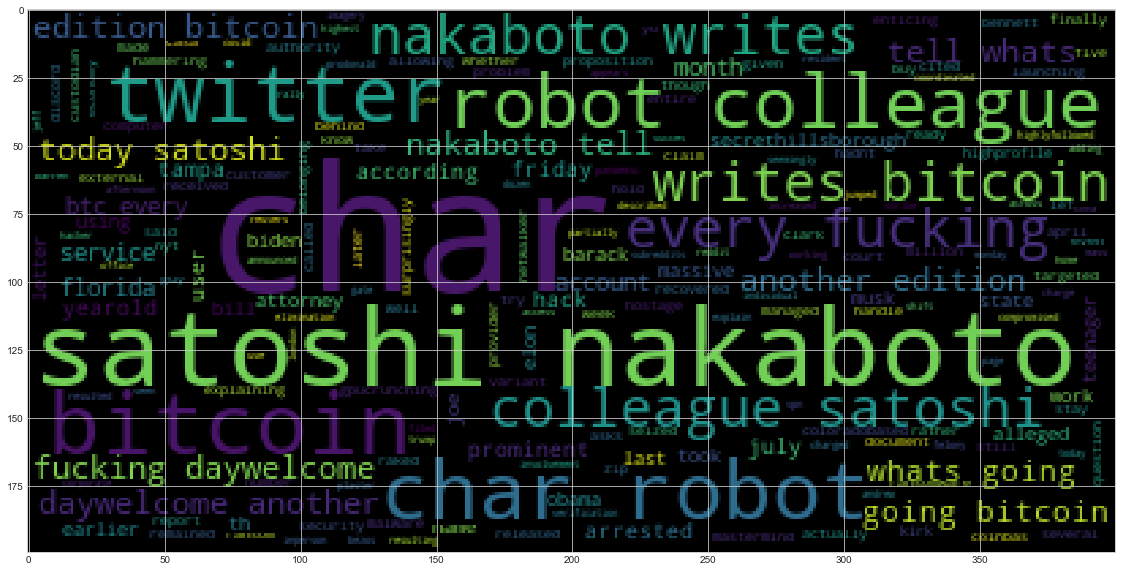

In [23]:
# Generate the Bitcoin word cloud
btc_wordcloud = WordCloud().generate(' '.join([btc for tokens in btc_df.Tokens for btc in tokens]))
plt.imshow(btc_wordcloud)

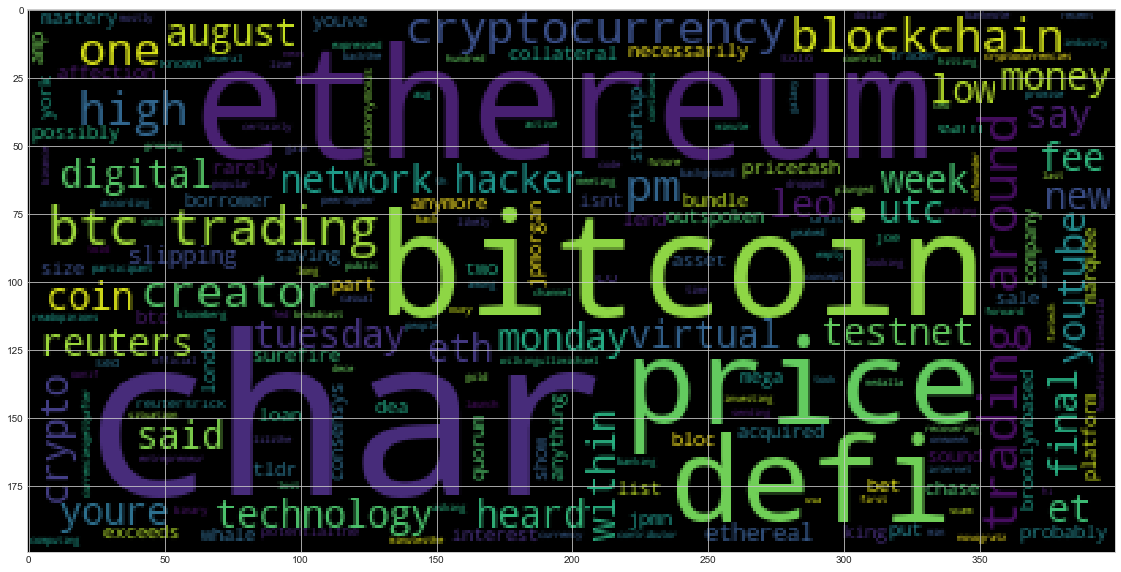

In [24]:
# Generate the Ethereum word cloud
eth_wordcloud = WordCloud().generate(' '.join([eth for tokens in eth_df.Tokens for eth in tokens]))
plt.imshow(eth_wordcloud)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenate all of the bitcoin text together
btc_concat = btc_df.text.sum()

In [29]:
# Run the NER processor on all of the text
nerprocessor = nlp(btc_concat)
# Add a title to the document
nerprocessor.user_data["title"] = "Bitcoin Named Entity Recognition"

In [30]:
# Render the visualization
displacy.render(nerprocessor, style='ent')

In [31]:
# List all Entities
for entity in nerprocessor.ents:
    print("Entity Name: ", entity.text, "Type of Entity: ", entity.label_)

Entity Name:  Tampa Type of Entity:  GPE
Entity Name:  Florida Type of Entity:  GPE
Entity Name:  the Twitter Bitcoin Type of Entity:  FAC
Entity Name:  July 15th, 2020 Type of Entity:  DATE
Entity Name:  Colorado Type of Entity:  GPE
Entity Name:  Coinbas Type of Entity:  ORG
Entity Name:  July 15 Type of Entity:  DATE
Entity Name:  Friday Type of Entity:  DATE
Entity Name:  yo Type of Entity:  PERSON
Entity Name:  April Type of Entity:  DATE
Entity Name:  the Secret Service Type of Entity:  ORG
Entity Name:  100 Type of Entity:  CARDINAL
Entity Name:  Clark Type of Entity:  GPE
Entity Name:  NYT Type of Entity:  ORG
Entity Name:  Weeks later Type of Entity:  DATE
Entity Name:  Bennett Type of Entity:  PERSON
Entity Name:  the Secret Service Type of Entity:  ORG
Entity Name:  100 Type of Entity:  CARDINAL
Entity Name:  Bitcoins Type of Entity:  PERSON
Entity Name:  chars]The Type of Entity:  NORP
Entity Name:  GPU Type of Entity:  ORG
Entity Name:  months Type of Entity:  DATE
Entity 

---

## Ethereum NER

In [32]:
# Concatenate all of the bitcoin text together
eth_concat = eth_df.text.sum()

In [33]:
# Run the NER processor on all of the text
nerprocessoreth = nlp(eth_concat)
# Add a title to the document
nerprocessoreth.user_data["title"] = "Ethereum Named Entity Recognition"

In [34]:
# Render the visualization
displacy.render(nerprocessoreth, style='ent')

In [35]:
# List all Entities
for entity in nerprocessoreth.ents:
    print("Entity Name: ", entity.text, "Type of Entity: ", entity.label_)

Entity Name:  29.81 Type of Entity:  MONEY
Entity Name:  August 17 Type of Entity:  DATE
Entity Name:  97% Type of Entity:  PERCENT
Entity Name:  Reuters Type of Entity:  ORG
Entity Name:  about 20% Type of Entity:  PERCENT
Entity Name:  YORK Type of Entity:  PERSON
Entity Name:  Reuters Type of Entity:  ORG
Entity Name:  Brooklyn Type of Entity:  GPE
Entity Name:  ConsenSys Type of Entity:  ORG
Entity Name:  JPMorgan Chase &amp Type of Entity:  ORG
Entity Name:  Co Type of Entity:  ORG
Entity Name:  marquee blockchain platform Type of Entity:  ORG
Entity Name:  Quorum Type of Entity:  ORG
Entity Name:  Tuesday Type of Entity:  DATE
Entity Name:  Bitcoin Type of Entity:  GPE
Entity Name:  BTC Type of Entity:  ORG
Entity Name:  two Type of Entity:  CARDINAL
Entity Name:  UNUS SED LEO Type of Entity:  ORG
Entity Name:  LEO Type of Entity:  ORG
Entity Name:  Rick Wilking Type of Entity:  PERSON
Entity Name:  Michael Novogratz Type of Entity:  PERSON
Entity Name:  Bloomberg Type of Entity: